In [5]:
%pip install opencv-python
%pip install tensorflow-hub

import numpy as np
import cv2

import matplotlib.pyplot as plt

import PIL.Image as Image
import os

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
Note: you may need to restart the kernel to use updated packages.


In [68]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [13]:
image_labels=[]
with open("ImageNetLabels.txt") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)
data_dir

'./datasets/flower_photos'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [20]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

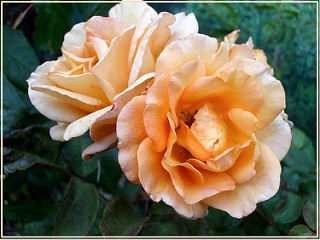

In [24]:
Image.open(roses[2])

In [28]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

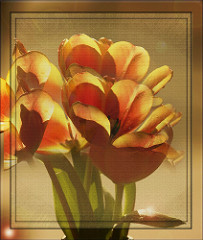

In [31]:
Image.open(tulips[2])

In [32]:
flowers_images_dict = {
  'roses': list(data_dir.glob('roses/*')),
  'tulips': list(data_dir.glob('tulips/*')),
  'daisy': list(data_dir.glob('daisy/*')),
  'sunflowers': list(data_dir.glob('sunflowers/*')),
  'dandelion': list(data_dir.glob('dandelion/*')),
}

In [48]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [33]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [36]:
str(flowers_images_dict['roses'][1])

'datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'

In [40]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [41]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [47]:
flowers_images_dict


{'roses': [PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
  PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
  PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
  PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
  PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
  PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
  PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
  PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
  PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
  PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
  PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
  PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
  PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
  PosixPath('datasets/flower_photos/roses/8723

In [49]:
X,y=[],[]

# for key,value in flowers_images_dict.items():
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [55]:
X = np.array(X)
y = np.array(y)
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [57]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [59]:
X_train_scaled[0]

array([[[0.71764706, 0.71372549, 0.70588235],
        [0.70196078, 0.69019608, 0.6745098 ],
        [0.63137255, 0.61960784, 0.6       ],
        ...,
        [0.18431373, 0.23921569, 0.23137255],
        [0.17254902, 0.23921569, 0.22745098],
        [0.18823529, 0.2627451 , 0.25098039]],

       [[0.65098039, 0.64313725, 0.62745098],
        [0.68235294, 0.67058824, 0.65490196],
        [0.68627451, 0.6745098 , 0.65490196],
        ...,
        [0.18431373, 0.23921569, 0.23137255],
        [0.18823529, 0.24313725, 0.23529412],
        [0.20392157, 0.27058824, 0.25882353]],

       [[0.65490196, 0.64705882, 0.63137255],
        [0.66666667, 0.65490196, 0.63529412],
        [0.6627451 , 0.64705882, 0.62745098],
        ...,
        [0.19607843, 0.24313725, 0.23921569],
        [0.21176471, 0.2627451 , 0.25882353],
        [0.22745098, 0.29019608, 0.28235294]],

       ...,

       [[0.0627451 , 0.11764706, 0.08235294],
        [0.05098039, 0.1254902 , 0.09019608],
        [0.03921569, 0

In [60]:
X[0].shape


(224, 224, 3)

In [61]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [62]:
x0_resized=cv2.resize(X[0], IMAGE_SHAPE)
x1_resized=cv2.resize(X[1], IMAGE_SHAPE)
x2_resized=cv2.resize(X[2], IMAGE_SHAPE)

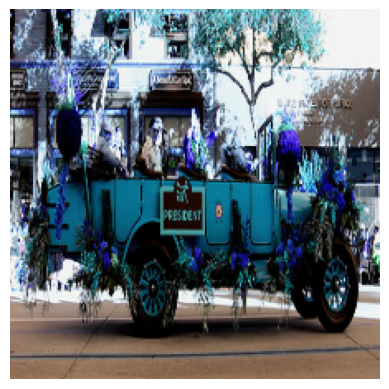

In [63]:
plt.axis('off')
plt.imshow(X[0])

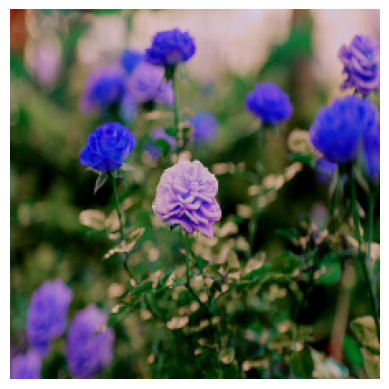

In [64]:
plt.axis('off')
plt.imshow(X[1])


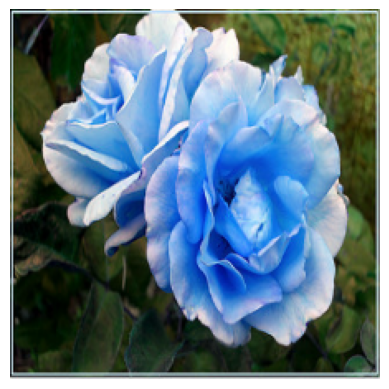

In [65]:
plt.axis('off')
plt.imshow(X[2])


In [66]:
predicted=classifier.predict(np.array([x0_resized,x1_resized,x2_resized]))
predicted=np.argmax(predicted, axis=-1)
predicted

2023-01-11 16:23:45.559437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-11 16:23:45.726189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


array([795, 795, 722])

In [67]:
image_labels[795]

'shower curtain'

In [70]:
image_labels[722]

'pillow'

In [71]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
  feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [73]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [74]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


2023-01-11 16:40:29.093503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 41s 434ms/step - loss: 0.8221 - accuracy: 0.6839
Epoch 2/5
86/86 [==============================] - 37s 434ms/step - loss: 0.4274 - accuracy: 0.8441
Epoch 3/5
86/86 [==============================] - 38s 440ms/step - loss: 0.3323 - accuracy: 0.8866
Epoch 4/5
86/86 [==============================] - 32s 371ms/step - loss: 0.2774 - accuracy: 0.9055
Epoch 5/5
86/86 [==============================] - 33s 388ms/step - loss: 0.2381 - accuracy: 0.9270


In [75]:
model.evaluate(X_test_scaled, y_test)

2023-01-11 16:43:34.715580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 13s 400ms/step - loss: 0.3679 - accuracy: 0.8725


[0.36785903573036194, 0.8725489974021912]